# Calculate optimal 2 by 2 with 30 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.utils import calculate_beam_lengths, get_input_count
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

In [10]:
cell_size = [2, 2]
original_angles = [0, 30, 60, 90, 120, 150, 180]
print(calculate_beam_lengths(cell_size, original_angles))

([0.5, 1.0, 1.118033988749895], [0, 26.565051177077994, 90, 180])


prefill replay memory
start training
 new max record arrange grid:  2.94408715378619
 new max record arrange grid:  3.442753992421038
 new max record arrange grid:  3.8068297712845096
   10 mean training reward:  3.27
 new max record arrange grid:  4.431872994352577
   20 mean training reward:  3.43
   30 mean training reward:  3.30
   40 mean training reward:  3.35
   50 mean training reward:  3.19
   60 mean training reward:  3.38
   70 mean training reward:  3.38
   80 mean training reward:  3.38
   90 mean training reward:  3.40
  100 mean training reward:  3.41
  110 mean training reward:  3.36
  120 mean training reward:  3.16
  130 mean training reward:  3.27
  140 mean training reward:  3.35
  150 mean training reward:  3.42
  160 mean training reward:  3.36
  170 mean training reward:  3.25
  180 mean training reward:  3.38
  190 mean training reward:  3.32
  200 mean training reward:  3.52
 new max record arrange grid:  4.474624872537751
  210 mean training reward:  3.59
  22

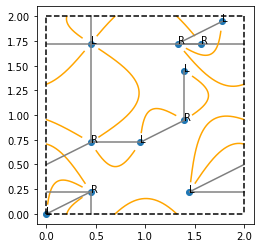

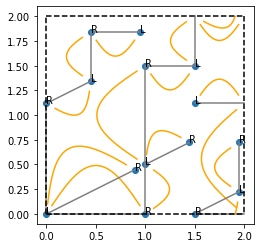

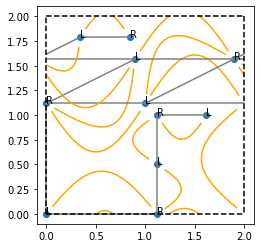

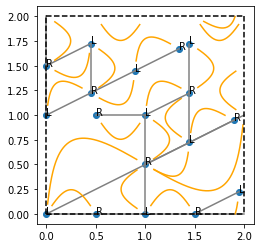

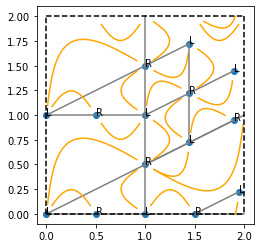

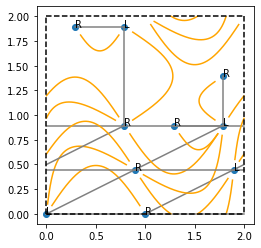

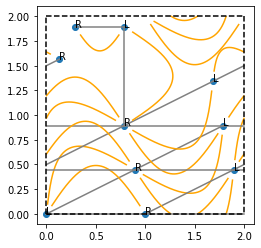

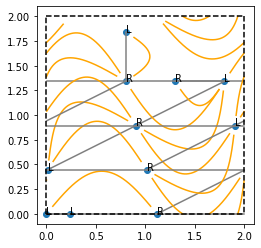

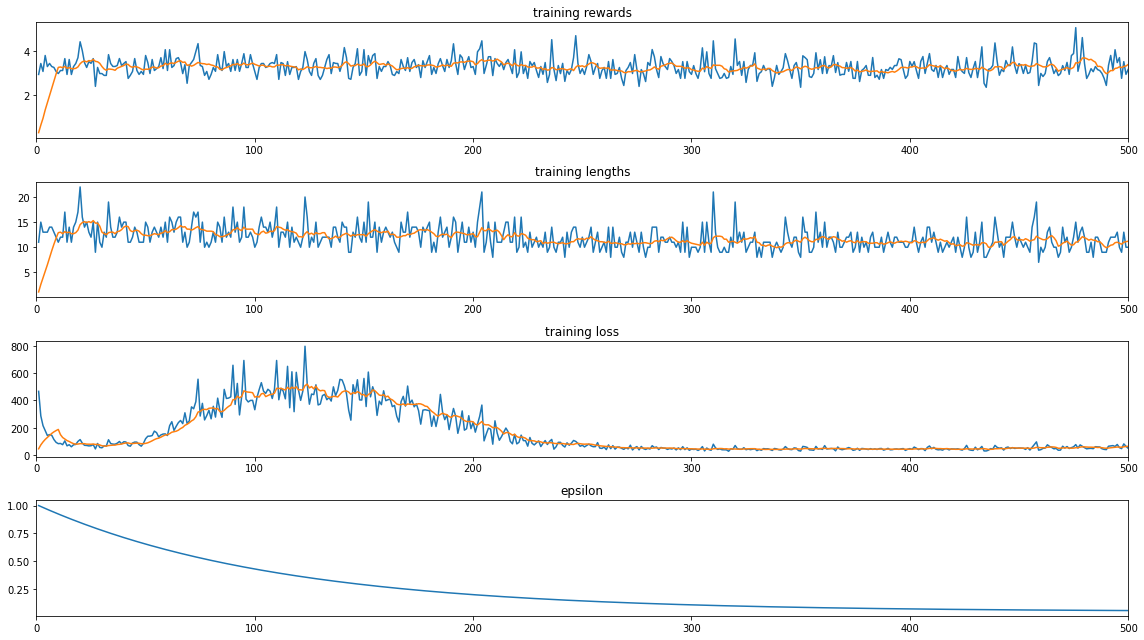

[2.94408715378619, 2.94408715378619, 3.442753992421038, 3.442753992421038, 3.8068297712845096, 3.8068297712845096, 4.431872994352577, 4.431872994352577, 4.474624872537751, 4.474624872537751, 4.52747044264537, 4.52747044264537, 4.708569385985415, 4.708569385985415, 5.0745219285586645, 5.0745219285586645]
[1, 2, 2, 4, 4, 20, 20, 204, 204, 236, 236, 247, 247, 476, 476, 500]


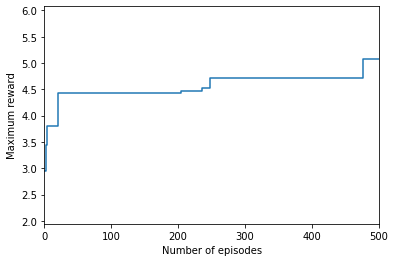

In [3]:
cell_size = [2, 2]
original_angles = [0, 30, 60, 90, 120, 150, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)
n_inputs = get_input_count(angles)

# we start from scratch here
subgraphs = Subgraphs(angles=angles,
                      lengths=lengths)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=cell_size[0] + 1,
                           n_cells_y=cell_size[1] + 1,
                           subgraphs=subgraphs)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=n_inputs, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

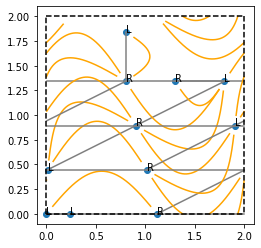

In [4]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [5]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')

In [9]:
max(agent.rewards)

5.0745219285586645

In [7]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)

In [8]:
load_agent.get_graph_state()

array([[1., 0., 3., 3., 0., 0., 0., 0., 0., 0.]])